In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

Sales Date from 2010-2012
Contains 
* 1.Store,
* 2.Dept,
* 3.Date,
* 4.Weekly_Sales,
* 5.IsHoliday**

In [7]:
sales = pd.read_csv('/kaggle/input/retail-data-analytics/Sales data-Set.csv')
print("Sales Total Col.",len(sales.columns),"\nShape:",sales.shape)



Sales Total Col. 5 
Shape: (421570, 5)


In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


**Information of the **

In [9]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
sales.describe()

**STORES**

In [11]:
stores = pd.read_csv('/kaggle/input/retail-data-analytics/stores.csv')
print("Stores Total Col.",len(stores.columns),"\nShape:",stores.shape)

Stores Total Col. 3 
Shape: (45, 3)


In [ ]:
stores.info()

In [ ]:
stores.describe()

**Features**
Contains additional data related to the store, department, and regional activity for the given dates.

* Store - the store number
* Date - the week
* Temperature - average temperature in the region
* Fuel_Price - cost of fuel in the region
* MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
* CPI - the consumer price index
* Unemployment - the unemployment rate
* IsHoliday - whether the week is a special holiday week

In [14]:
features = pd.read_csv('/kaggle/input/retail-data-analytics/features.csv')
print("Features Total Col.",len(features.columns),"\nShape:",features.shape)

Features Total Col. 12 
Shape: (8190, 12)


In [15]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


**Merging Analysing Data**
* Sales and store*

In [12]:
sales.loc[sales['Store'] == 1]

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
10239,1,99,2012-08-31,20.06,False
10240,1,99,2012-09-07,0.05,True
10241,1,99,2012-09-14,0.03,False
10242,1,99,2012-10-05,635.00,False


**Merging Analysing**
* features and store

In [19]:
features.loc[features['Store'] == 1]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
177,1,2013-06-28,83.94,3.495,4205.98,796.70,6.84,3816.78,4812.74,NaN,NaN,False
178,1,2013-07-05,79.85,3.422,7649.99,3503.29,1766.77,9454.96,1079.89,NaN,NaN,False
179,1,2013-07-12,83.12,3.400,6089.94,1362.42,209.62,2367.42,2651.05,NaN,NaN,False
180,1,2013-07-19,79.26,3.556,3117.04,1060.39,199.05,1012.30,5381.72,NaN,NaN,False


In [20]:
sales.loc[(sales['Store'] == 1) & (sales['Date'] == '2010-02-05') & (sales['IsHoliday'] == False)]


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
143,1,2,2010-02-05,50605.27,False
286,1,3,2010-02-05,13740.12,False
429,1,4,2010-02-05,39954.04,False
572,1,5,2010-02-05,32229.38,False
...,...,...,...,...,...
9370,1,93,2010-02-05,64494.87,False
9513,1,94,2010-02-05,56655.39,False
9656,1,95,2010-02-05,106690.06,False
9921,1,97,2010-02-05,32153.04,False


In [21]:
features.loc[(features['Store'] == 1) & (features['Date'] == '2010-02-05') & (features['IsHoliday'] == False)]


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


**Merging the sales dataset with Features data set**

In [22]:
data = sales.merge(features,how="left", on=['Store', 'Date', 'IsHoliday'])
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [23]:
data.loc[(data['Store'] == 1) & (data['Date'] == '2010-02-05') & (data['IsHoliday'] == False)]


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
143,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
286,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
429,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
572,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9370,1,93,2010-02-05,64494.87,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
9513,1,94,2010-02-05,56655.39,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
9656,1,95,2010-02-05,106690.06,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
9921,1,97,2010-02-05,32153.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [ ]:
stores.loc[stores['Store'] == 1]

In [27]:
data = data.merge(stores, how= "left", on=['Store'])
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [28]:
data.loc[(data['Store'] == 1) & (data['Date'] =='2010-02-05' ) & (data['IsHoliday'] == False)]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
143,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
286,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
429,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
572,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9370,1,93,2010-02-05,64494.87,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
9513,1,94,2010-02-05,56655.39,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
9656,1,95,2010-02-05,106690.06,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
9921,1,97,2010-02-05,32153.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


**Details of the column**

In [29]:
intialData = data
print("Total Col. of final data ",len(data.columns),"\nShape:",data.shape,"\nColumns",data.columns.tolist())

Total Col. of final data  16 
Shape: (421570, 16) 
Columns ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size']


**Explore Data**
* Numerical Data
* Numerical Variables

In [31]:
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables : \n'.format(len(numerical)), numerical)
data[numerical].head()


There are 14 numerical variables : 
 ['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size']


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
0,1,1,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,151315
1,1,1,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,151315
2,1,1,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,151315
3,1,1,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,151315
4,1,1,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,151315


**Replacing the missing numerical varibles**

In [32]:
data[numerical].isnull().sum()

# Replace NaN with default values
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan,strategy='constant', fill_value = 0) 
imputer.fit(data[numerical]) 
data[numerical]=imputer.transform(data[numerical])
data[numerical].isnull().sum()




Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Size            0
dtype: int64

In [33]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1.0,1.0,2010-02-05,24924.50,0.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315.0
1,1.0,1.0,2010-02-12,46039.49,1.0,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315.0
2,1.0,1.0,2010-02-19,41595.55,0.0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315.0
3,1.0,1.0,2010-02-26,19403.54,0.0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315.0
4,1.0,1.0,2010-03-05,21827.90,0.0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315.0


**Checking for Outliers**

In [ ]:
# view summary statistics in numerical variables to check for outlier
print(round(data[numerical].describe()),3)

 **plot box** 
 * outliers for weekly_sales & Markdowns**

Text(0, 0.5, 'MarkDown5')

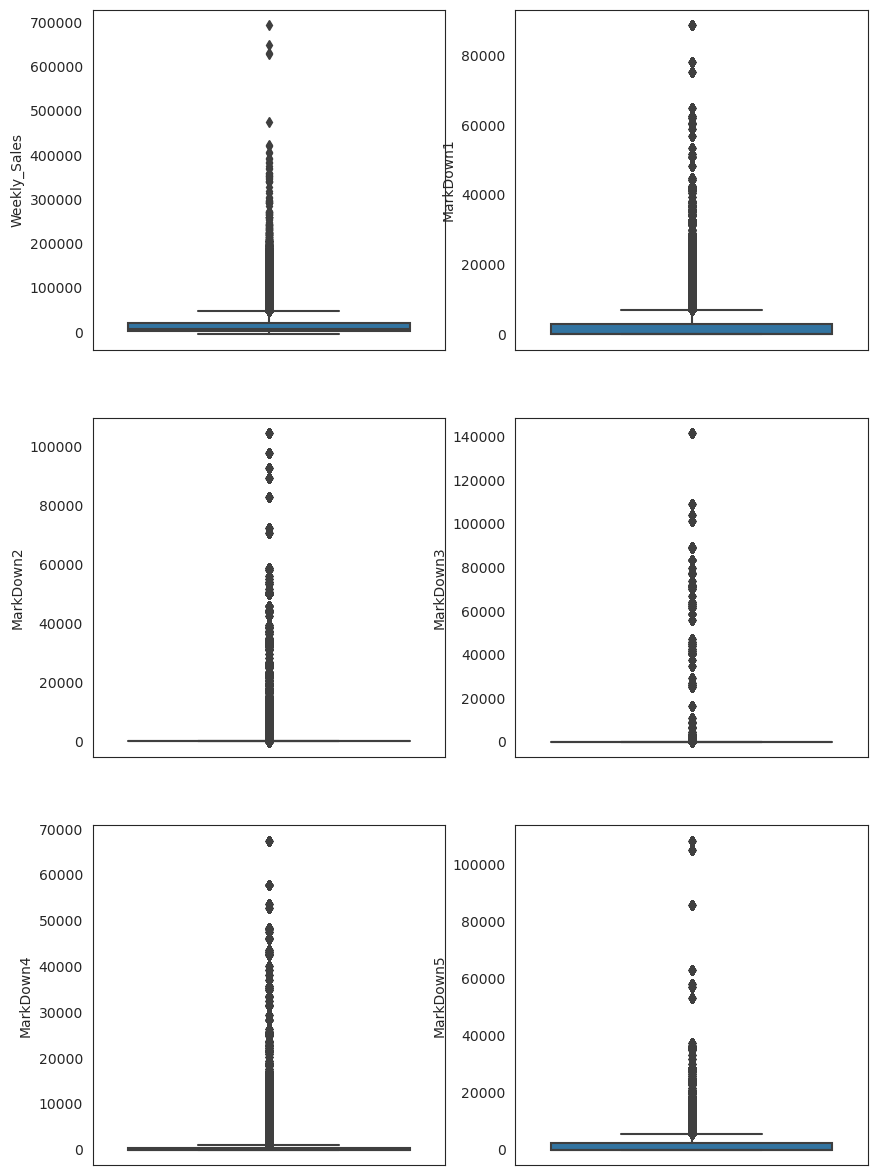

In [34]:
plt.figure(figsize=(10,15))

plt.subplot(3, 2, 1) # Parameter we want a grid with 3 rows and 2 columns of subplots. The i variable determines the position of the current subplot.
fig = sns.boxplot(y=data['Weekly_Sales']) #creat box plot with data Column
fig.set_ylabel('Weekly_Sales')

plt.subplot(3, 2, 2)
fig = sns.boxplot(y=data["MarkDown1"])
fig.set_ylabel('MarkDown1')

plt.subplot(3, 2, 3)
fig = sns.boxplot(y=data['MarkDown2'])
fig.set_ylabel('MarkDown2')

plt.subplot(3, 2, 4)
fig = sns.boxplot(y=data['MarkDown3'])
fig.set_ylabel('MarkDown3')

plt.subplot(3, 2, 5)
fig = sns.boxplot(y=data['MarkDown4'])
fig.set_ylabel('MarkDown4')

plt.subplot(3, 2, 6)
fig = sns.boxplot(y=data['MarkDown5'])
fig.set_ylabel('MarkDown5')

**plot histogram to check distribution**

Text(0.5, 0, 'Date')

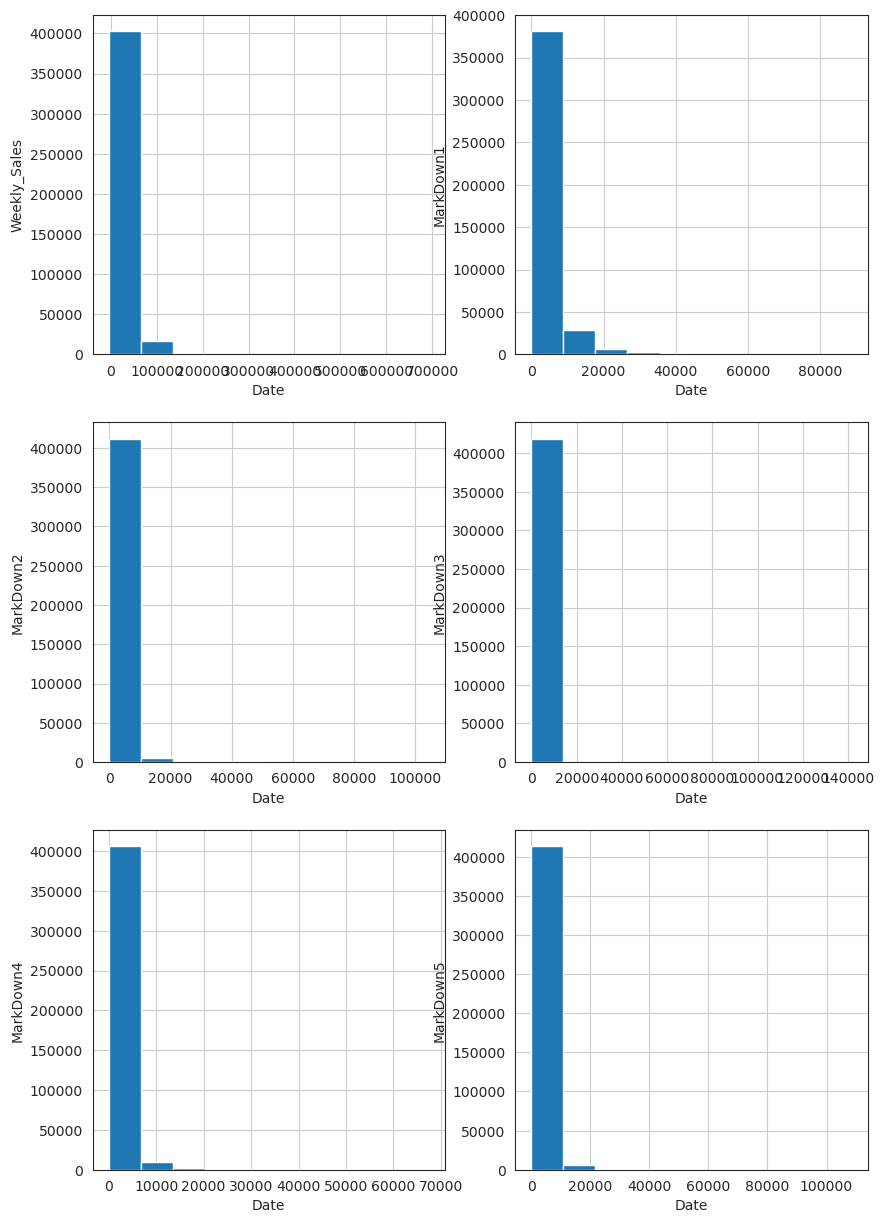

In [35]:
plt.figure(figsize=(10,15))

plt.subplot(3, 2, 1)
fig = data.Weekly_Sales.hist(bins=10)
fig.set_ylabel('Weekly_Sales')
fig.set_xlabel('Date')

plt.subplot(3, 2, 2)
fig = data.MarkDown1.hist(bins=10)
fig.set_ylabel('MarkDown1')
fig.set_xlabel('Date')

plt.subplot(3, 2, 3)
fig = data.MarkDown2.hist(bins=10)
fig.set_ylabel('MarkDown2')
fig.set_xlabel('Date')

plt.subplot(3, 2, 4)
fig = data.MarkDown3.hist(bins=10)
fig.set_ylabel('MarkDown3')
fig.set_xlabel('Date')

plt.subplot(3, 2, 5)
fig = data.MarkDown4.hist(bins=10)
fig.set_ylabel('MarkDown4')
fig.set_xlabel('Date')

plt.subplot(3, 2, 6)
fig = data.MarkDown5.hist(bins=10)
fig.set_ylabel('MarkDown5')
fig.set_xlabel('Date')

**find outliers for Weekly_Sales variable**

In [36]:
IQR = data.Weekly_Sales.quantile(0.75) - data.Weekly_Sales.quantile(0.25)
Weekly_Sales_Lower_fence = data.Weekly_Sales.quantile(0.25) - (IQR * 3)
Weekly_Sales_Upper_fence = data.Weekly_Sales.quantile(0.75) + (IQR * 3)
print('Outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Weekly_Sales_Lower_fence, upperboundary=Weekly_Sales_Upper_fence))


Outliers are values < -52298.9575 or > 74584.45999999999


In [37]:
print('Number of outliers below lower boundary = {} and those above upper boundary = {}'. format(data[ (data.Weekly_Sales< Weekly_Sales_Lower_fence)]['Weekly_Sales'].count(), data[(data.Weekly_Sales> Weekly_Sales_Upper_fence)]['Weekly_Sales'].count()))


Number of outliers below lower boundary = 0 and those above upper boundary = 12830


**outliers for markdown value from MarkDown1 to MarkDown5**

In [38]:
#outliers for MarkDown1
IQR = data.MarkDown1.quantile(0.75) - data.MarkDown1.quantile(0.25)
MarkDown1_Lower_fence = data.MarkDown1.quantile(0.25) - (IQR * 3)
MarkDown1_Upper_fence = data.MarkDown1.quantile(0.75) + (IQR * 3)
print('Outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=MarkDown1_Lower_fence, upperboundary=MarkDown1_Upper_fence))

Outliers are values < -8427.150000000001 or > 11236.2


In [39]:
#outliers for MarkDown2
IQR = data.MarkDown4.quantile(0.75) - data.MarkDown4.quantile(0.25)
MarkDown4_Lower_fence = data.MarkDown4.quantile(0.25) - (IQR * 3)
MarkDown4_Upper_fence = data.MarkDown4.quantile(0.75) + (IQR * 3)
print('Outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=MarkDown4_Lower_fence, upperboundary=MarkDown4_Upper_fence))


Outliers are values < -1275.8700000000001 or > 1701.16


In [ ]:
print('Number of outliers below lower boundary = {} and those above upper boundary = {}'. format(data[ (data.MarkDown4< MarkDown4_Lower_fence)]['MarkDown4'].count(), data[(data.MarkDown4> MarkDown4_Upper_fence)]['MarkDown4'].count()))


In [40]:
#outliers for MarkDown3
IQR = data.MarkDown3.quantile(0.75) - data.MarkDown3.quantile(0.25)
MarkDown3_Lower_fence = data.MarkDown3.quantile(0.25) - (IQR * 3)
MarkDown3_Upper_fence = data.MarkDown3.quantile(0.75) + (IQR * 3)
print('Outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=MarkDown3_Lower_fence, upperboundary=MarkDown3_Upper_fence))


Outliers are values < -13.620000000000001 or > 18.16


In [41]:
print('Number of outliers below lower boundary = {} and those above upper boundary = {}'. format(data[ (data.MarkDown3< MarkDown3_Lower_fence)]['MarkDown3'].count(), data[(data.MarkDown3> MarkDown3_Upper_fence)]['MarkDown3'].count()))


Number of outliers below lower boundary = 72 and those above upper boundary = 75124


In [43]:
#outliers for MarkDown4
IQR = data.MarkDown4.quantile(0.75) - data.MarkDown4.quantile(0.25)
MarkDown4_Lower_fence = data.MarkDown4.quantile(0.25) - (IQR * 3)
MarkDown4_Upper_fence = data.MarkDown4.quantile(0.75) + (IQR * 3)
print('Outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=MarkDown4_Lower_fence, upperboundary=MarkDown4_Upper_fence))


Outliers are values < -1275.8700000000001 or > 1701.16


In [44]:
print('Number of outliers below lower boundary = {} and those above upper boundary = {}'. format(data[ (data.MarkDown4< MarkDown4_Lower_fence)]['MarkDown4'].count(), data[(data.MarkDown4> MarkDown4_Upper_fence)]['MarkDown4'].count()))

Number of outliers below lower boundary = 0 and those above upper boundary = 61565


In [45]:
#outliers for MarkDown5
IQR = data.MarkDown1.quantile(0.75) - data.MarkDown5.quantile(0.25)
MarkDown5_Lower_fence = data.MarkDown5.quantile(0.25) - (IQR * 3)
MarkDown5_Upper_fence = data.MarkDown5.quantile(0.75) + (IQR * 3)
print('Outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=MarkDown5_Lower_fence, upperboundary=MarkDown5_Upper_fence))

Outliers are values < -8427.150000000001 or > 10595.190000000002


In [46]:
print('Number of outliers below lower boundary = {} and those above upper boundary = {}'. format(data[ (data.MarkDown5< MarkDown5_Lower_fence)]['MarkDown5'].count(), data[(data.MarkDown5> MarkDown5_Upper_fence)]['MarkDown5'].count()))


Number of outliers below lower boundary = 0 and those above upper boundary = 8212


# Note
***Sales might hike during holidays which will cause these outliers. Due to which I will not be removing these outliers during prediction.***

# Duplicate Values

In [47]:
print("Duplicate Values : ",data.duplicated().sum())


Duplicate Values :  0


# categorical variables 

In [48]:
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables : \n'.format(len(categorical)), categorical)
data[categorical].head()

There are 2 categorical variables : 
 ['Date', 'Type']


,Date,Type
0,2010-02-05,A
1,2010-02-12,A
2,2010-02-19,A
3,2010-02-26,A
4,2010-03-05,A


In [49]:
data['Date']= pd.to_datetime(data['Date'], infer_datetime_format=True)  


In [50]:
for var in categorical:
    print(var, ' contains ', len(data[var].unique()), ' labels')


Date  contains  143  labels
Type  contains  3  labels


# Year/Month wise sales Analysis
**create a dataframe with only date and weekly sales details**

In [51]:
average_sales_per_date = data.loc[:, ('Date','Weekly_Sales')]
average_sales_per_date['Month'] =pd.DatetimeIndex(average_sales_per_date['Date']).month
average_sales_per_date['Year'] =pd.DatetimeIndex(average_sales_per_date['Date']).year
average_sales_per_date.head()


,Date,Weekly_Sales,Month,Year
0,2010-02-05,24924.50,2,2010
1,2010-02-12,46039.49,2,2010
2,2010-02-19,41595.55,2,2010
3,2010-02-26,19403.54,2,2010
4,2010-03-05,21827.90,3,2010


In [52]:
# get sales per month
average_sales_per_month = average_sales_per_date.groupby(by=['Month'], as_index=False)['Weekly_Sales'].sum()
average_sales_per_month.head()

# sort by month 
average_sales_per_month= average_sales_per_month.sort_values('Month', ascending=True)
average_sales_per_month.head()



,Month,Weekly_Sales
0,1,3.325984e+08
1,2,5.687279e+08
2,3,5.927859e+08
3,4,6.468598e+08
4,5,5.571256e+08


<Axes: xlabel='Month', ylabel='Weekly_Sales'>

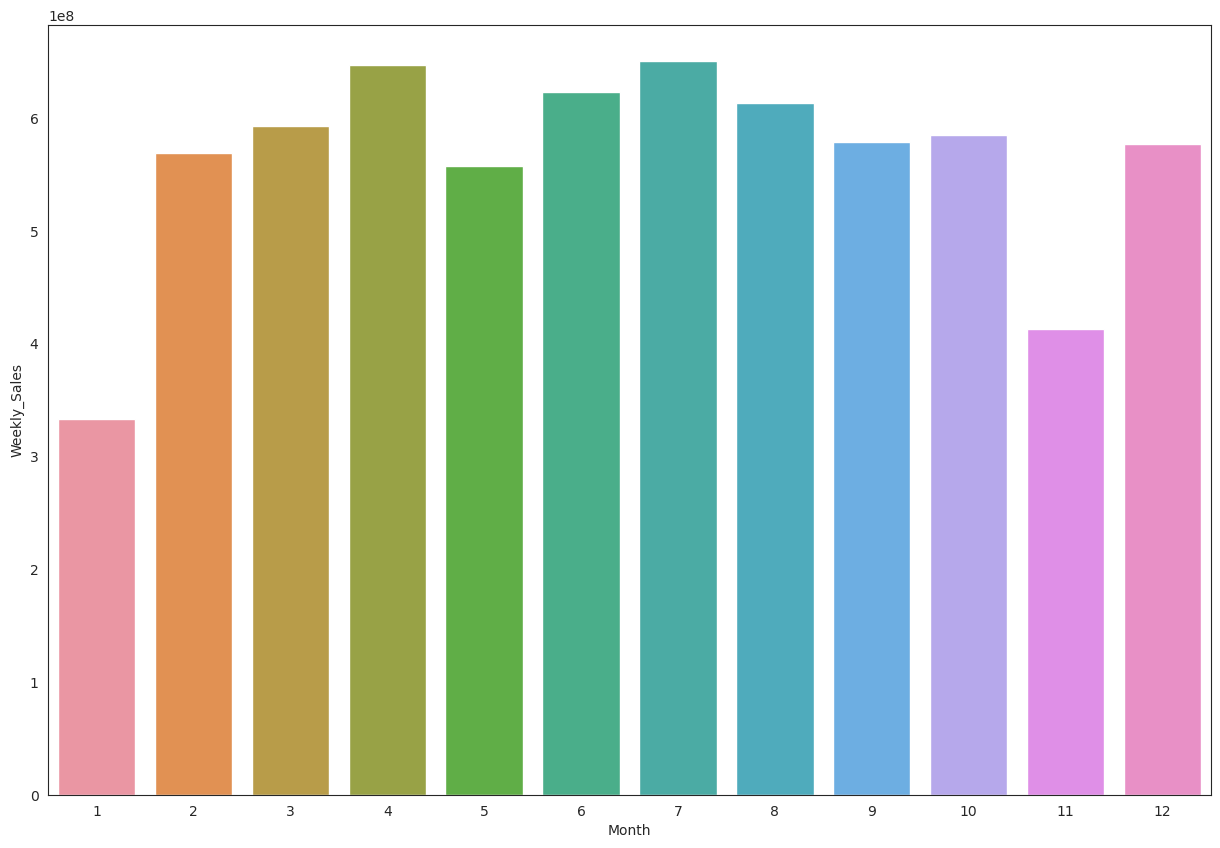

In [53]:
# plot average sales for all store/department per week
plt.figure(figsize=(15,10))
sns.barplot(x=average_sales_per_month.Month, y=average_sales_per_month.Weekly_Sales)


<Axes: xlabel='Year', ylabel='Weekly_Sales'>

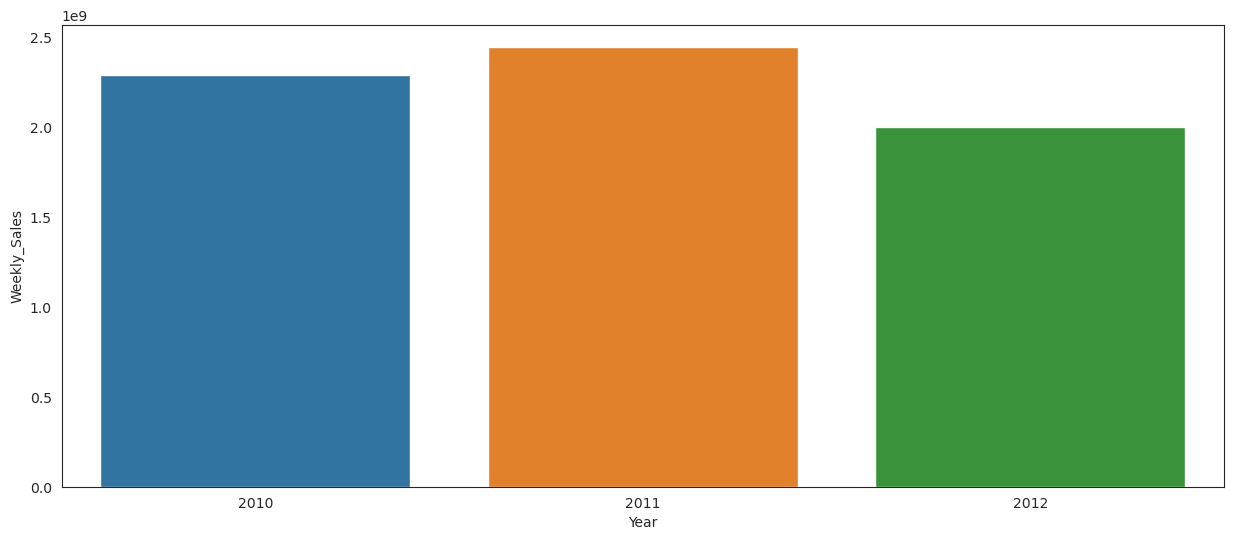

In [54]:
# get sales per year 
average_sales_per_year = average_sales_per_date.groupby(by=['Year'], as_index=False)['Weekly_Sales'].sum()
average_sales_per_year.head()

# sort by year 
average_sales_per_year= average_sales_per_year.sort_values('Year', ascending=True)
average_sales_per_year.head()

# plot total sales for all store/department per week
plt.figure(figsize=(15,6))
sns.barplot(x=average_sales_per_year.Year, y=average_sales_per_year.Weekly_Sales)



In [55]:
print('The data is from {} till {}'.format(data['Date'].min(), data['Date'].max()))


The data is from 2010-02-05 00:00:00 till 2012-10-26 00:00:00


# NOTE

**The data is from 2010-01-10 00:00:00 till 2012-12-10 00:00:00**


Low sales shown in above bar graphs for the month of December and for the year 2012 could be due to the incomplete December month sales data for the year 2012.

There is hike in sales during holidays (Black friday Sales,Chrismas,New year).
People tend to buy less during the months of January and November.

# Store wise Analysis

In [ ]:
# Sales for all store/department based on store type
sales_per_store_type=data.groupby(by=['Type'], as_index=False)['Weekly_Sales'].sum()
sales_per_store_type.head()

In [56]:
# average sales for all store/department per week split on store type
sales_per_store_type_n = data.groupby(by=['Date','Type'], as_index=False)['Weekly_Sales'].sum()
sales_per_store_type_n.head()

,Date,Type,Weekly_Sales
0,2010-02-05,A,32144126.25
1,2010-02-05,B,14775498.62
2,2010-02-05,C,2831115.63
3,2010-02-12,A,30982570.79
4,2010-02-12,B,14439178.59


<Axes: xlabel='Date', ylabel='Weekly_Sales'>

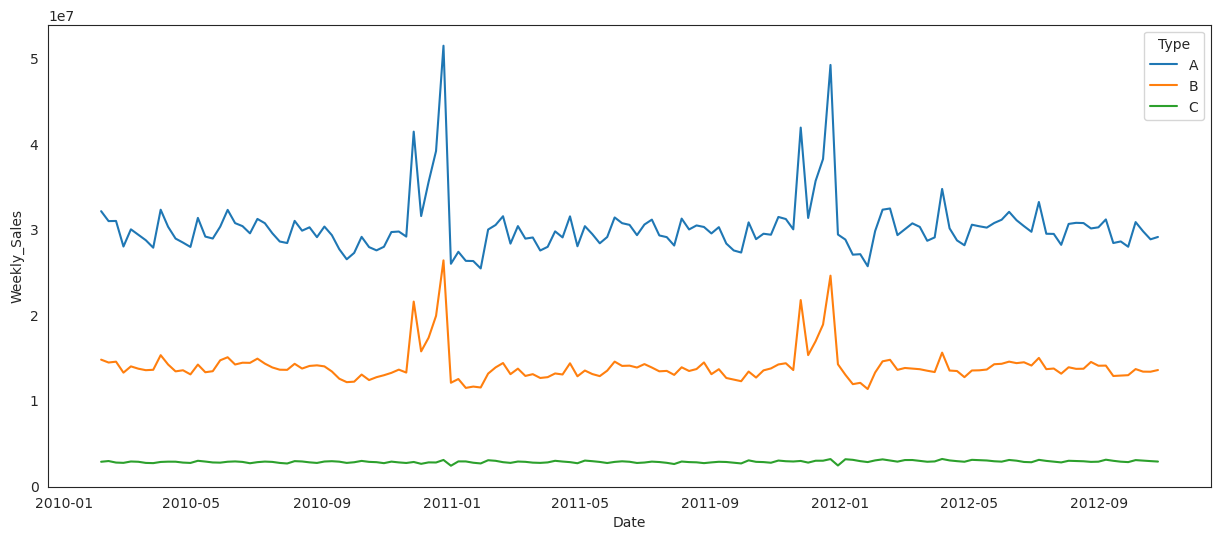

In [57]:
# plot average sales for all store/department per week split on store type
plt.figure(figsize=(15,6))
sns.lineplot(data=sales_per_store_type_n, x="Date", y="Weekly_Sales", hue="Type")

<Axes: xlabel='Type', ylabel='Weekly_Sales'>

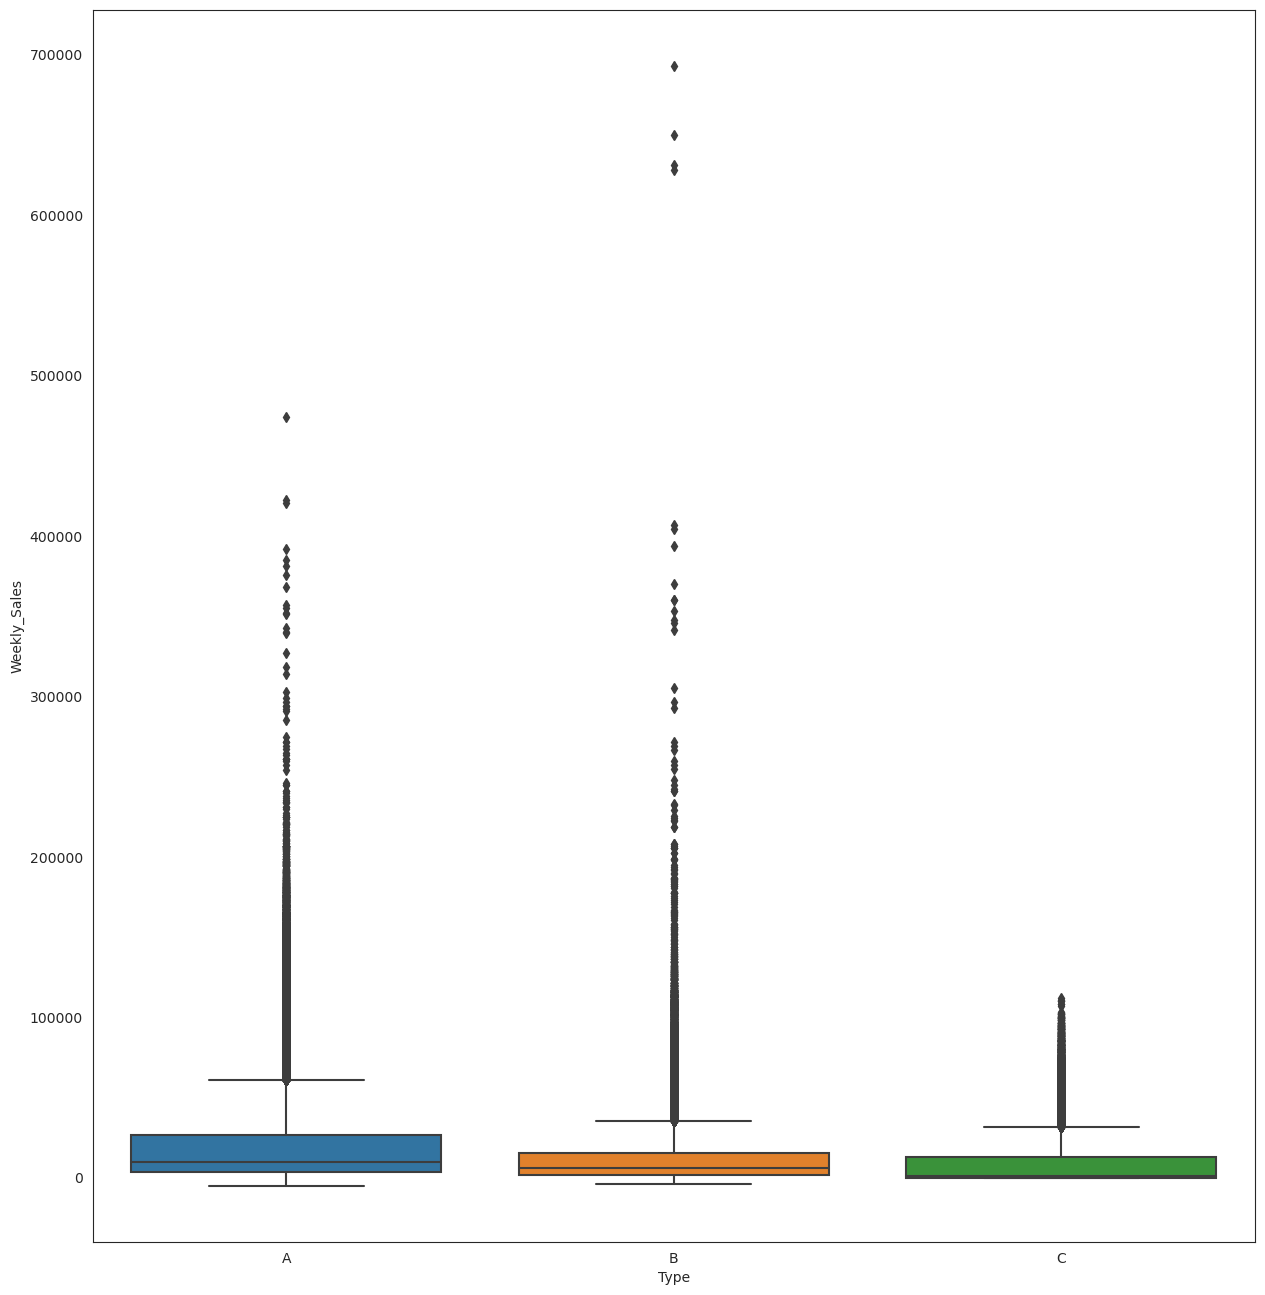

In [59]:
plt.figure(figsize=(15,16))
# plot the weekly sales of stores per type
sns.boxplot(data = data,y="Weekly_Sales",x="Type")


<Axes: xlabel='Type', ylabel='Size'>

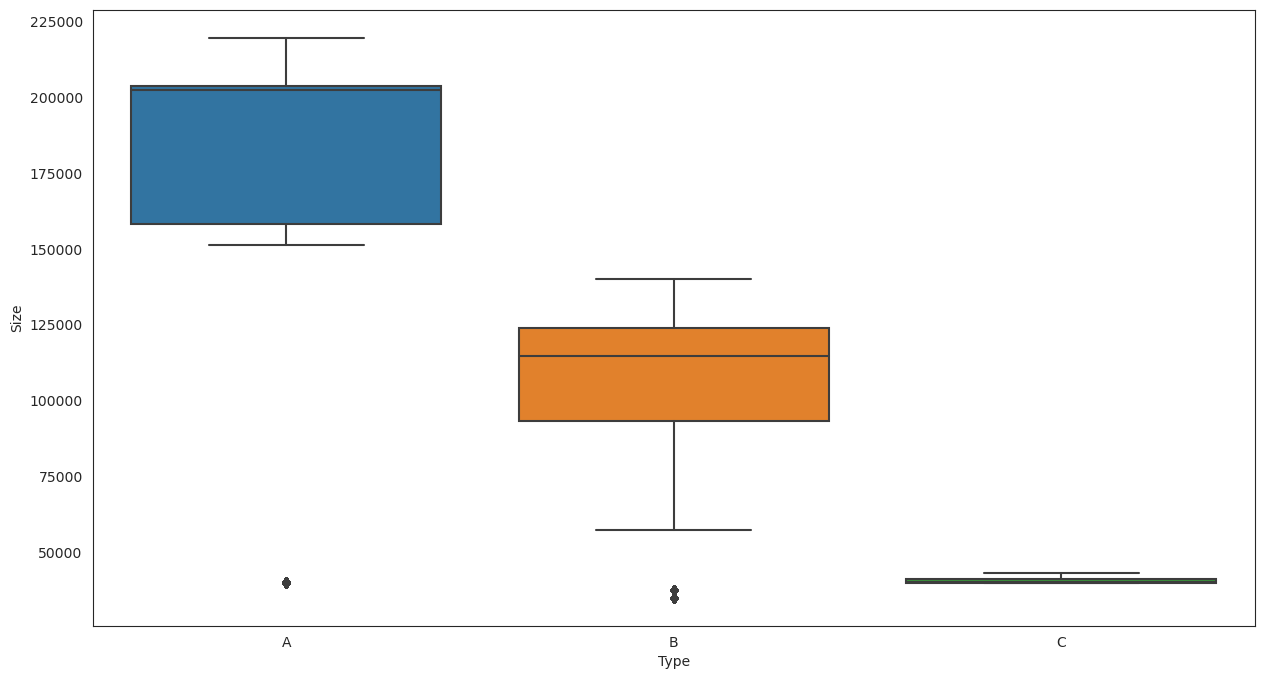

In [60]:
plt.figure(figsize=(15,8))
# plot the size of stores per type
sns.boxplot(data = data,y="Size",x="Type")

# Inference

1. Overall weekly sales of store A is high, followed by B and then C.
1. Type A & B store show spike during holidays whereas Type C is onsistent
1. over every month and doesnot show much deviation.
1. Store Count is in the order A, followed by B and then C
1. Size wise store A has most no of Items followed by B and then C
1. Store B had the highest weekly sale.

# Department wise Analysis

In [24]:
len(data["Dept"].unique())

81

In [61]:
#weekly sales of Department
sales_by_dept = data.groupby(by=['Dept'], as_index=False)['Weekly_Sales'].sum()
sales_by_dept.head()


,Dept,Weekly_Sales
0,1.0,1.236388e+08
1,2.0,2.806112e+08
2,3.0,7.589245e+07
3,4.0,1.671467e+08
4,5.0,1.356074e+08


Text(0.5, 0, 'Department')

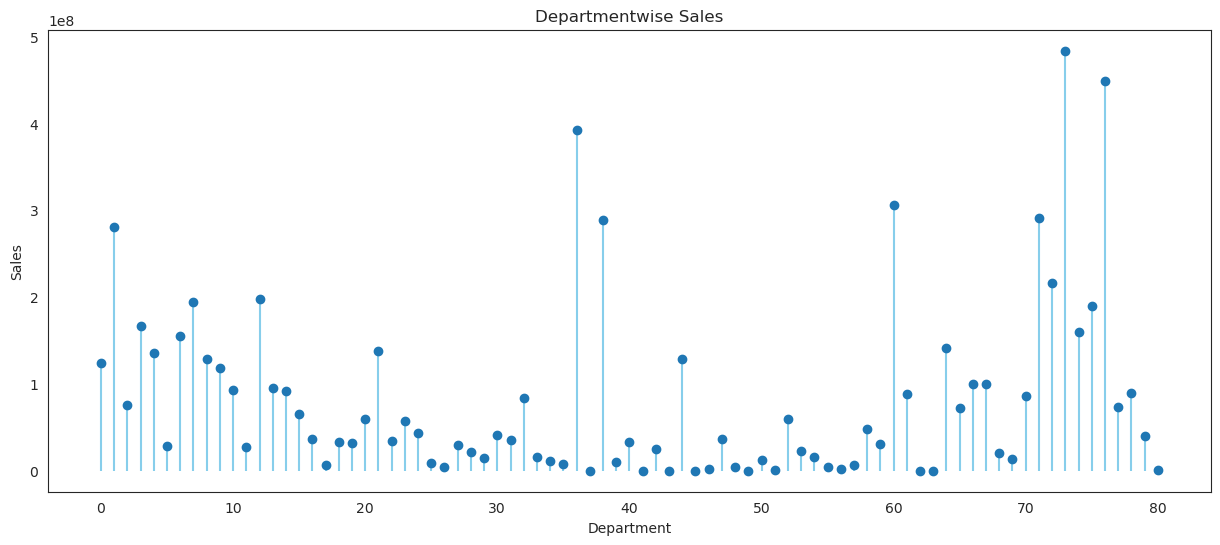

In [62]:
fig1, ax1 = plt.subplots(figsize=(15, 6))
plt.vlines(x=sales_by_dept.index, ymin=0, ymax=sales_by_dept['Weekly_Sales'], color='skyblue')
plt.plot(sales_by_dept.index,sales_by_dept['Weekly_Sales'], "o")
plt.title("Departmentwise Sales")
plt.ylabel("Sales")
plt.xlabel("Department")

# Ploting other fields against date

In [ ]:
data[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, figsize=(30,60))
plt.show()

# Data Analysis
**Seasonality Vs Trend Analysis**

In [65]:
# average sales for all store/department per week
average_sales_per_week = data.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
average_sales_per_week.head()

,Date,Weekly_Sales
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30


In [66]:
# sort by date 
average_sales_per_week= average_sales_per_week.sort_values('Date', ascending=True)
average_sales_per_week.head()


,Date,Weekly_Sales
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30


In [69]:
# average sales for all store/department per week split on holiday
average_sales_per_week_n = data.groupby(by=['Date','IsHoliday'], as_index=False)['Weekly_Sales'].sum()
average_sales_per_week_n.head()

,Date,IsHoliday,Weekly_Sales
0,2010-02-05,0.0,49750740.50
1,2010-02-12,1.0,48336677.63
2,2010-02-19,0.0,48276993.78
3,2010-02-26,0.0,43968571.13
4,2010-03-05,0.0,46871470.30


In [70]:
# sort by date 
average_sales_per_week_n= average_sales_per_week_n.sort_values('Date', ascending=True)
average_sales_per_week_n.head()

,Date,IsHoliday,Weekly_Sales
0,2010-02-05,0.0,49750740.50
1,2010-02-12,1.0,48336677.63
2,2010-02-19,0.0,48276993.78
3,2010-02-26,0.0,43968571.13
4,2010-03-05,0.0,46871470.30


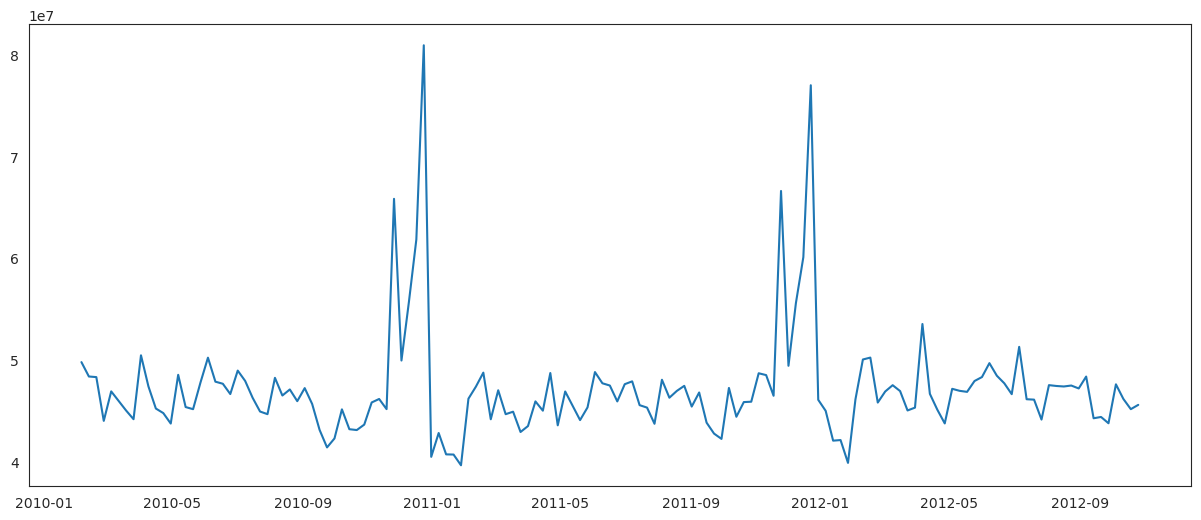

In [71]:
# plot average sales for all store/department per week
plt.figure(figsize=(15,6))
plt.plot(average_sales_per_week.Date, average_sales_per_week.Weekly_Sales)
plt.show()

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

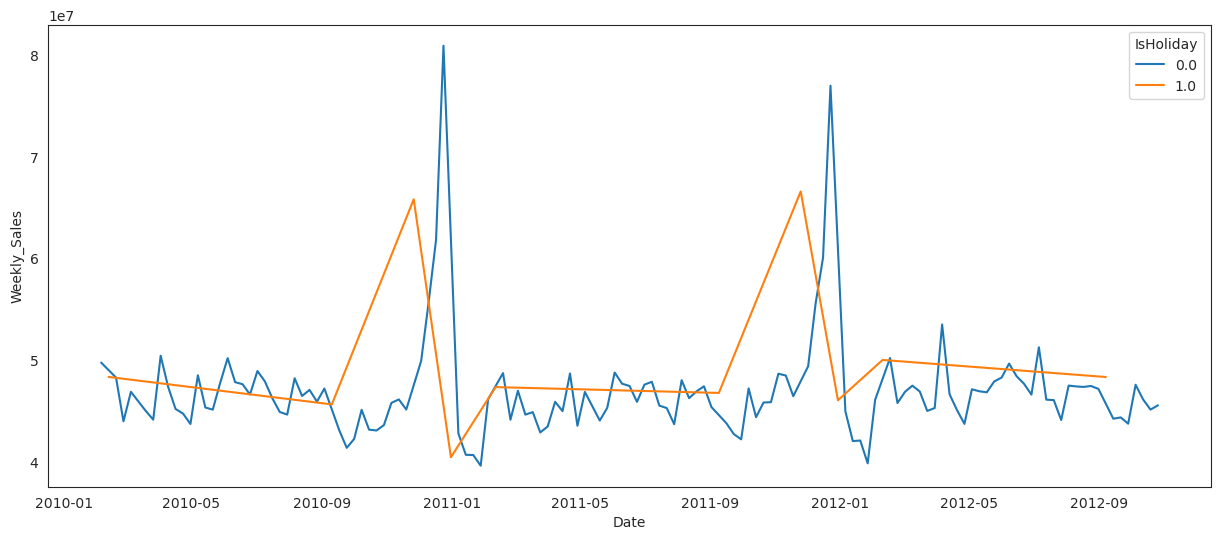

In [72]:
# plot average sales for all store/department per week split by holiday
plt.figure(figsize=(15,6))
sns.lineplot(data=average_sales_per_week_n, x="Date", y="Weekly_Sales", hue="IsHoliday")


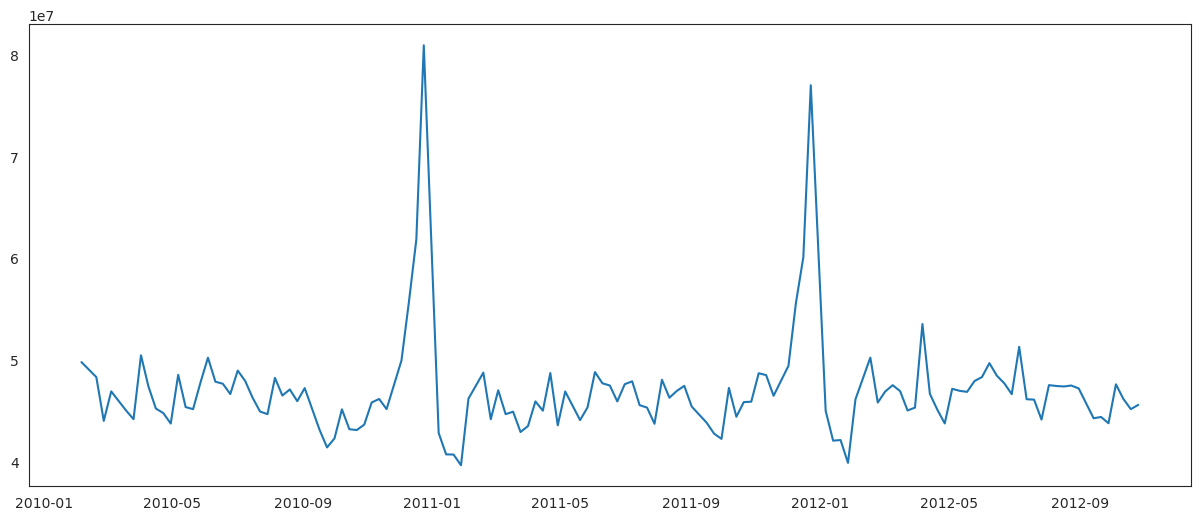

In [73]:
# plot average sales for all store/department per week when IsHoliday = False
plt.figure(figsize=(15,6))
plt.plot(average_sales_per_week_n[(average_sales_per_week_n.IsHoliday==False)]['Date'], average_sales_per_week_n[(average_sales_per_week_n.IsHoliday==False)]['Weekly_Sales'])
plt.show()


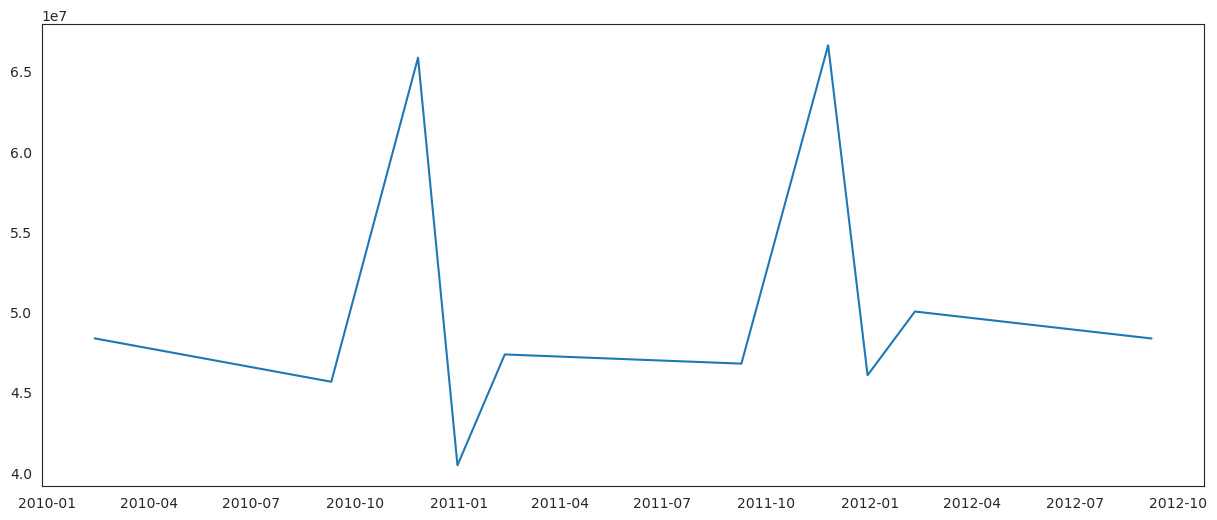

In [74]:
# plot average sales for all store/department per week when IsHoliday = True
plt.figure(figsize=(15,6))
plt.plot(average_sales_per_week_n[(average_sales_per_week_n.IsHoliday==True)]['Date'], average_sales_per_week_n[(average_sales_per_week_n.IsHoliday==True)]['Weekly_Sales'])
plt.show()

# Inference :

1. Nov- Dec shows spike in Weekly Sales.The sales total has not increased over year.
1. Weeks near holiday shows peak in sales.
